# Dissecando a Análise de Componentes Principais

*Fonte: Adaptado da Postagem de 2014 de [Pyhton4Oceanographers](https://ocefpaf.github.io/python4oceanographers/blog/2014/12/01/PCA/)*

A Análise de Componentes Principais (em inglês PCA) é o nome comum dado à técnica que usa princípios de álgebra linear para transformar variáveis, possivelmente correlacionadas, em um número menor de variáveis chamadas de Componentes Principais (novamente em inglês PC). <br>

A PCA é usada em diversas aplicações, desde a compressão de dados (MP3, JPG) até remoção de ruídos, passando pela análises de grande quantidade de dados.<br>

## PCA do ponto de vista da Geometria Espacial
<br>
Em termos gerais a PCA busca reduzir o número de dimensões de um set de dados. Projetando os dados em um novo plano. Usando essa nova projeção os dados originais, que podem envolver diversas variáveis, podem ser interpretados utilizando menos "dimensões."<br>

No set de dados reduzido podemos observar com mais clareza tendências, padrões e/ou outliers. Mas vale lembrar que a regra: "Se não está nos dados brutos não existe!" é sempre válida. A PCA fornece apenas mais clareza aos padrões que já estão lá.
<br>
Utilizaremos dois vetores 1D conhecidos $(x, y)$ para entender essa nova projeção que a PCA faz. Note que os vetores possuem uma clara dependência linear.<br>

O primeiro passo é remover as médias dos dados.<br>

(Dados e exemplo: http://bekoc.blogspot.com.br/2013/12/implementing-principle-component.html)


In [ ]:
import numpy as np
from pandas import DataFrame

x = np.array([2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2.0, 1.0, 1.5, 1.1])
y = np.array([2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9])

Z = np.c_[x - x.mean(), y - y.mean()]
df = DataFrame(Z, columns=['x', 'y'])
df.index.name = 'Medidas'
df.T

Medidas,0,1,2,3,4,5,6,7,8,9
x,0.69,-1.31,0.39,0.09,1.29,0.49,0.19,-0.81,-0.31,-0.71
y,0.49,-1.21,0.99,0.29,1.09,0.79,-0.31,-0.81,-0.31,-1.01


O segundo passo é a normalização dos dados. A mais costumeira é, após remover a média, dividir os dados pelo desvio padrão. Esse procedimento também é chamado de z-score.

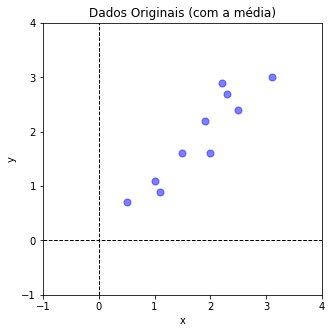

In [ ]:
import matplotlib.pyplot as plt

line = dict(linewidth=1, linestyle='--', color='k')
marker = dict(linestyle='none', marker='o', markersize=7, color='blue', alpha=0.5)


fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, y, **marker)
ax.axhline(**line)
ax.axvline(**line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(u'Dados Originais (com a média)')
_ = ax.axis([-1, 4, -1, 4])

O terceiro passo é calcular a covariância dos dados normalizados.

In [ ]:
cov = np.cov(Z.T)
cov

array([[0.61655556, 0.61544444],
       [0.61544444, 0.71655556]])

A "redução" dos dados pode ser feita por Singular Value Decomposition (SVD) ou Empirical Orthogonal Functions (EOF). Estamos buscando planos ortogonais entre as variáveis que maximize a variança.
<br>
Vamos utilizar a EOF, ou seja, calculando os Autovalores e Autovetores da matriz de covariança. Mas colocarei aqui o correspondente usando a SVD como exercício:

In [ ]:
U, S, V = np.linalg.svd(cov, full_matrices=True, compute_uv=True)

S  # Similar aos Autovalores
V  # Similar aos Autovetores
PCs = np.dot(V, Z.T)  # Crie um gráfico que se compare com os abaixo.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [ ]:
eigenvalues

array([0.0490834 , 1.28402771])

In [ ]:
eigenvectors

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

As componentes principais são os Autovetores. É comum normalizar os Autovetores para facilitar as comparações entre eles.

In [ ]:
pc = eigenvectors[1] / eigenvectors[0]
pc

array([-0.92205261,  1.08453681])

Vamos plotar os vetores que definem esse novo plano ortogonal saindo do ponto $(0, 0)$ até $x$ máximo (Autovalor) e $y$ máximo (componente principal normalizada e dimensionada para o autovalor.)

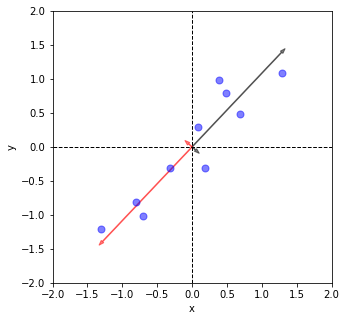

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(Z[:, 0], Z[:, 1], **marker)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.axhline(**line)
ax.axvline(**line)
ax.set_xlabel('x')
ax.set_ylabel('y')

arrowprops = dict(width=0.01, head_width=0.05, alpha = 0.5,
                  length_includes_head=False)
a1 = ax.arrow(0, 0, eigenvalues[0], pc[0] * eigenvalues[0],
              color='k', **arrowprops)
a2 = ax.arrow(0, 0, eigenvalues[1], pc[1] * eigenvalues[1],
              color='k', **arrowprops)
a3 = ax.arrow(0, 0, -eigenvalues[0], -pc[0] * eigenvalues[0],
              color='r', **arrowprops)
a4 = ax.arrow(0, 0, -eigenvalues[1], -pc[1] * eigenvalues[1],
              color='r', **arrowprops)

É fácil de ver que esse novo plano se orienta onde os dados variam. Bom, geometricamente e isso. Agora vamos testar um pacote pronto para a análise de PCA. Vou comparar o que acabamos de fazer com os resultados do módulo scikit-learn.

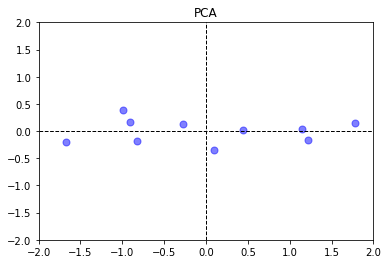

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, copy=True)
X = pca.fit_transform(Z)

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], **marker) 
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.axhline(**line)
ax.axvline(**line)
_ = ax.set_title("PCA")



Essa seria a cara dos dados "rodados" para o novo plano calculado pela análise. Para entender melhor o que isso quer dizer de uma olhada em:<br>

https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/<br>

Note que os dados em si são os mesmos. Nos apenas rodamos para um novo set de eixos (principais). Estamos literalmente olhado para os dados sob um novo ângulo ;-). Esse novo "ângulo" é mais intuitivo para tirarmos conclusões sobre os dados.
<br>
Um exemplo de aplicação direta em oceanografia física é rodar as componentes da velocidade $u$ e $v$ de um fundeio em rio ou na plataforma continental para os seus eixos principais. Intuitivamente podemos concluir que tais eixos, em geral, corresponderão aos "ao longo" e "perpendicular" à margem do rio ou dá isóbata do fundeio costeiro. Não é mais intuitivo que eixos geográficos Norte e Sul?<br>

(Aqui tem uma função faz exatamente isso para séries temporais de velocidade.) <br>

Vamos comprar os resultados entre sklearn e o que fizemos anteriormente:


In [ ]:
print(eigenvectors)
print('')
print(pca.components_)

[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]

[[-0.6778734  -0.73517866]
 [-0.73517866  0.6778734 ]]


Mesmo resultado! Mas note que as componentes estão organizadas em ordem crescente dos autovalores no módulo sklearn. O que mais temos no objeto pca:

In [ ]:
pca.explained_variance_ratio_  # Quanto da variância é explicada por cada componente.

array([0.96318131, 0.03681869])


## Entendendo a PCA do ponto de visto estatístico

Uma PCA entre duas variáveis, como fizemos no exemplo acima, não é muito diferente de uma correlação simples entre elas. A PCA começa a ser útil quando lidamos com diversas variáveis. Para entender essa afirmação vamos calcular a correlação de Pearson para os nossos dados.


In [ ]:
from scipy.stats.stats import pearsonr

r, p = pearsonr(x-x.mean(), y-y.mean())

print('Pearson r: {}\nPC 1: {}:'.format(r, pc[0]))

Pearson r: 0.9259292726922456
PC 1: -0.9220526104991974:


Bem próximo da variância explicada pela primeira PC. Já que estamos tentado relacionar esse resultado com correlação linear simples, como seria a relação entre a primeira Componente Principal e um ajuste linear?

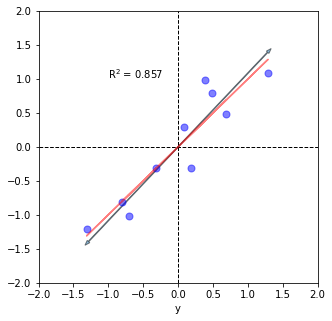

In [ ]:
import statsmodels.api as sm


def OLSreg(y, Xmat):
    return sm.OLS(y, sm.add_constant(Xmat, prepend=True)).fit()


scale = lambda x: (x - x.mean()) / x.std()

ols_fit = OLSreg(Z[:, 1], Z[:, 0])

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(Z[:, 0], Z[:, 1], **marker)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.axhline(**line)
ax.axvline(**line)
ax.set_xlabel('x')
ax.set_xlabel('y')

ax.plot(Z[:, 0], ols_fit.fittedvalues, 'r', alpha=0.5)
ax.text(-1, 1, r'R$^2$ = %4.3f' % round(ols_fit.rsquared, 3))

a1 = ax.arrow(0, 0, eigenvalues[1], pc[1] * eigenvalues[1],
              **arrowprops)
a2 = ax.arrow(0, 0, -eigenvalues[1], -pc[1] * eigenvalues[1],
              **arrowprops)

Há um ângulo pequeno entre as retas formadas pela correlação linear (vermelho) e a reta da primeira Componente Principal (azul). Eu gosto de pensar que a correlação linear está "contaminada" pela variância da segunda Componente Principal.

## PCA com dados reais
Agora vamos começar com a aplicação no PDI usando uma imagem multispectral. Para nós a imagem nada mais é do que um conjunto de matrizes multidimensionais (cada banda é uma dimensão). Temos uma certa limitação na visualização de todoas as bandas. <br>
O interprete humano só pode ver no máximo 3 bandas simultaneamente. <br>
Então com a análise de componenetes principais podemos reduzir o número de bandas, vamos encontrar dentro do espaço espectral uma rotação que mostre nas primeiras componentes os valores menos correlacionados, facilitando a diferenciação de classes próximas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install rasterio

In [ ]:
import rasterio
import numpy as np
import pandas as pd
from matplotlib import pyplot
src = rasterio.open('/content/drive/MyDrive/Colab Notebooks/Landsat_SSA_8B.tif')
#temos bandas de 1 à 7. O que significa 7 bandas no total
array = src.read(7)
pyplot.imshow(array, cmap='gray')
pyplot.show() 

In [ ]:

image= np.dstack((src.read(1),src.read(2),src.read(3),src.read(4),src.read(5),src.read(6),src.read(7)))
pyplot.scatter(image[0], image[1])
pyplot.show()


In [ ]:
image[1].size

In [ ]:
image.shape

In [ ]:
image[0,0,:]

In [ ]:
Matrix_pix=[]
for j in range (image.shape[1]-1): 
    for i in range(image.shape[0]-1): 
        Matrix_pix.append(image[i,j,:].reshape(-1))

In [ ]:
name_cols = ['pixel'+str(i) for i in range(55600)]

In [ ]:
df_image = pd.DataFrame(np.array(Matrix_pix).T,columns=name_cols)

In [ ]:

print(df_image)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7, copy=True)
X = pca.fit_transform(df_image)

In [ ]:
new_image=np.dot(X,df_image)

In [ ]:
new_image.shape

In [ ]:
#falta criar uma forma de voltar a imagem...

PCA_image=[]
c=0
for j in range (image.shape[1]-1): 
    c=c+j
    for i in range(image.shape[0]-1): 
        c=c+i              
        for k in range (6):            
            if (c==55599):
                print(i+j)


In [ ]:
im_cov=np.cov(df_image)


In [ ]:
U, S, V = np.linalg.svd(im_cov, full_matrices=True, compute_uv=True)

S  # Similar aos Autovalores
V  # Similar aos Autovetores
V.shape

In [ ]:
PCA_mat_image=np.dot(V,np.array(Matrix_pix).T)
PCA_mat_image.shape

In [ ]:
c=0
for j in range (image.shape[1]-1): 
    for i in range(image.shape[0]-1): 
        image[i,j,:]=PCA_mat_image[:,c].T
        c=c+1

In [ ]:
pyplot.imshow(image[:,:,3], cmap='gray')
pyplot.show() 

In [ ]:

image_PC= np.dstack((image[:,:,1],image[:,:,2],image[:,:,3]))
#pyplot.imshow(image_PC)
#pyplot.show() 
#pesquisar visualização de composições coloridas com mais de 8bits


## PCA na Compressão de Imagens

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

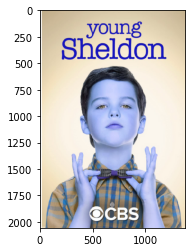

In [ ]:
# Loading the image 
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sheldon.png') #you can use any image you want.
plt.imshow(img)

In [ ]:
# Splitting the image in R,G,B arrays.
 
blue,green,red = cv2.split(img) 
#it will split the original image into Blue, Green and Red arrays.

In [ ]:
#initialize PCA with first 20 principal components
pca = PCA(30)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [ ]:
img_compressed = (np.dstack((blue_inverted, green_inverted, red_inverted))).astype(np.uint8)

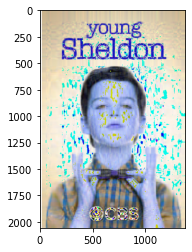

In [ ]:
#viewing the compressed image
plt.imshow(img_compressed)